<a href="https://colab.research.google.com/github/APFFM/project1/blob/main/2__Opening_Price_Prediction_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short Term Memory(LSTM) based - Stock predicition - # CPU based

Aim -to predict the Opening stock price using past 60 day stock price.



In [80]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import yfinance as yf
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
!pip install yfinance




## Data prep

Works on Yahoo based data. (Doesnt contain Indian stock values)

In [81]:
ticker = 'AMZN'  #amazon
start='2019-01-01'
end = '2023-11-15'

In [82]:
ticker = 'TSLA'  #Tesla start=   end = current date

In [83]:
ticker = 'UBER'  #Uber start=   end = current date

In [84]:
ticker = 'AAPL'  #Tesla start=   end = current date

Change start and end date for collection, as per Company.  (Start date cant be before the company was founded.)

Different approaches can be used for Date collection -


1.   Pretrain on 20+ year dataset, finetune for local
2.   Event specific timings - As in 2020, covid may lead to a new stock trading pattern.



In [85]:
# Set the ticker symbol (e.g., 'AAPL' for Apple Inc.) -- NVDA
#ticker_symbol = 'AMZN'

In [86]:
#Get stock quote - we import just the opening and closing Prices of stock, over 20 years duration

# df=web.DataReader(ticker, data_source='yahoo', start='2015-01-01', end='2020-05-24')    #YYYY-MM-DD
# df

# Set the ticker symbol (e.g., 'AAPL' for Apple Inc.) -- NVDA
#ticker_symbol = 'NVDA'

# Retrieve historical stock price data using the Yahoo Finance API
df = yf.download(ticker, start="2019-01-01", end="2023-11-15")


[*********************100%%**********************]  1 of 1 completed


In [87]:
df.shape

(1227, 6)

In [88]:
#choose plotting style

#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

<ipython-input-88-09f870d92308>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


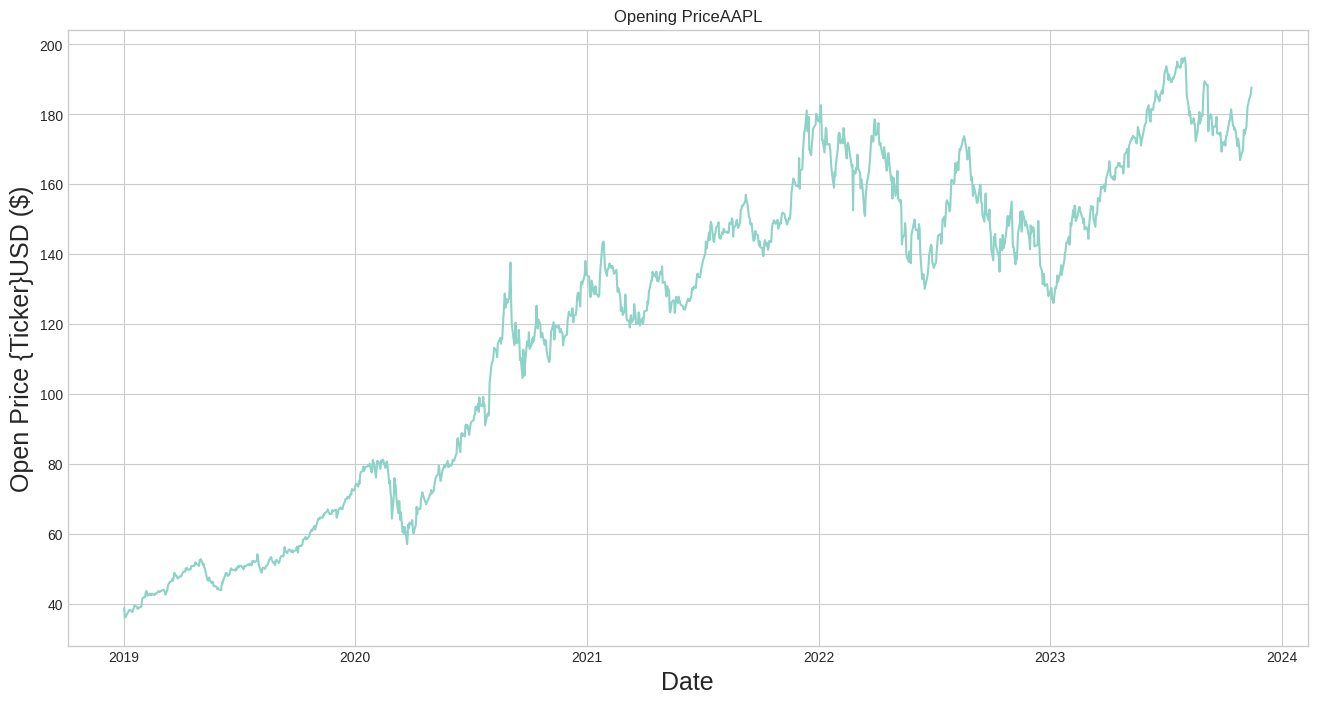

In [89]:
plt.figure(figsize=(16,8))
plt.title(f'Opening Price{ticker}')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price {Ticker}USD ($)', fontsize=18)
plt.show()

In [90]:
data=df.filter(['Open'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

982

In [91]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [92]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01702082, 0.        , 0.00085807, 0.00736373, 0.00870542,
       0.01140441, 0.01329215, 0.013885  , 0.01071798, 0.00981311,
       0.01419702, 0.01594434, 0.02109271, 0.01939219, 0.01586633,
       0.01580393, 0.01794128, 0.01842491, 0.01914257, 0.03006335,
       0.03452526, 0.03585137, 0.03655341, 0.04505601, 0.0478486 ,
       0.04433835, 0.03901839, 0.04223222, 0.04075012, 0.04276265,
       0.04014167, 0.04254423, 0.04014167, 0.04245063, 0.0434023 ,
       0.04305907, 0.04708416, 0.04638212, 0.04560206, 0.04733379,
       0.04727137, 0.04947113, 0.04986116, 0.04787981, 0.04663172,
       0.04109334, 0.04915911, 0.05619521, 0.05970546, 0.06227963,
       0.06376175, 0.06524385, 0.06922214, 0.06591469, 0.07182752,
       0.0801273 , 0.07415207, 0.07438611, 0.06984618, 0.07015819])]
[0.07153109960712276]



In [93]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [94]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(922, 60, 1)

## Model training

In [95]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [96]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [97]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3)

Epoch 1/3
922/922 [==============================] - 52s 50ms/step - loss: 0.0029
Epoch 2/3
922/922 [==============================] - 31s 33ms/step - loss: 0.0012
Epoch 3/3
922/922 [==============================] - 31s 34ms/step - loss: 7.8985e-04


## Testing and Validating model

In [98]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])



In [99]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [100]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [101]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


8/8 [==============================] - 3s 36ms/step


In [114]:
pred = data

In [115]:
      pred

,Open
Date,
2019-01-02,38.722500
2019-01-03,35.994999
2019-01-04,36.132500
2019-01-07,37.174999
2019-01-08,37.389999
...,...
2023-11-08,182.350006
2023-11-09,182.960007
2023-11-10,183.970001


In [102]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



3.621891535544882

In [122]:
#choose plotting style

#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
plt.style.use('bmh')
#plt.style.use('seaborn')

<ipython-input-124-b46943c42481>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


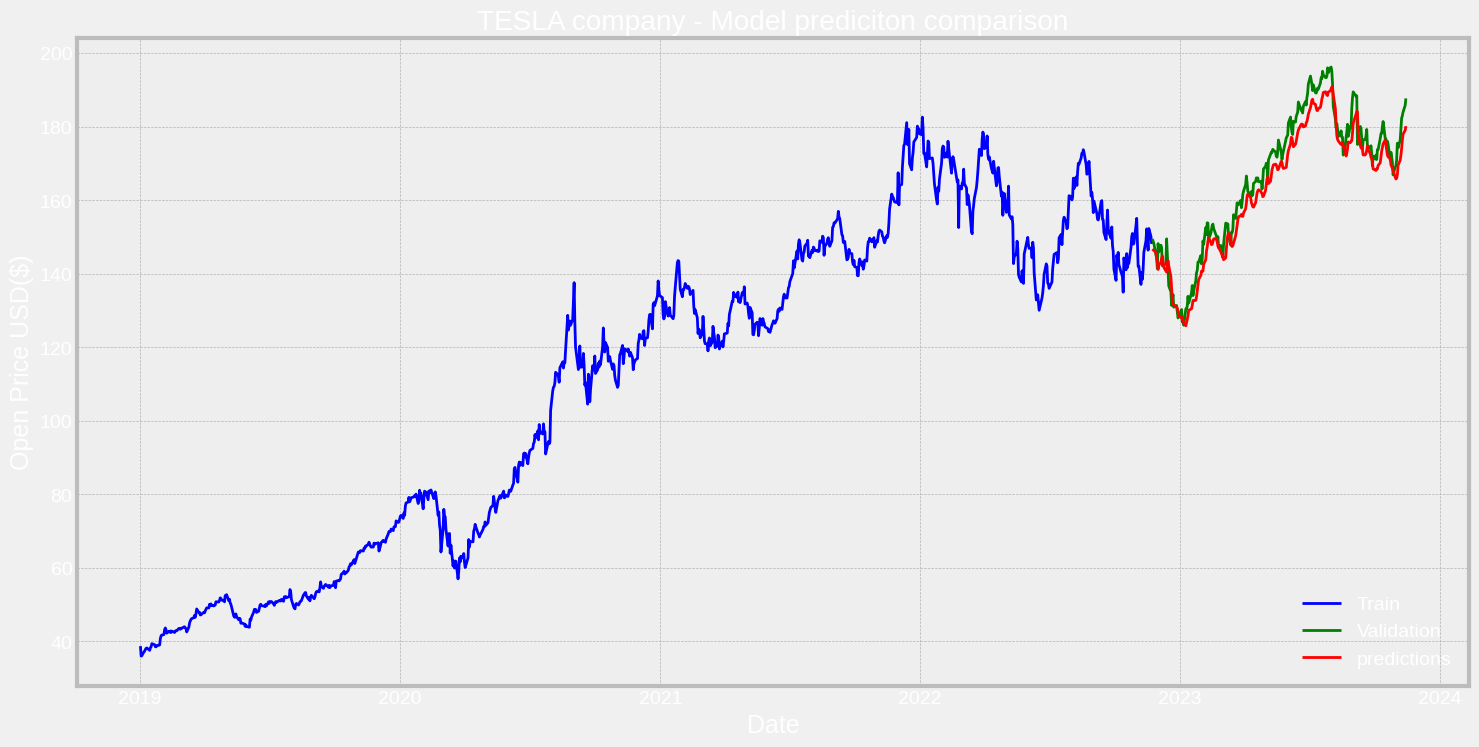

In [124]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('TESLA company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'] , color='blue')
plt.plot(valid['Open'] , color='green')
plt.plot(valid[ 'predictions'] , color='red')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('/content/prediction.png')
plt.show()


In [105]:
#Show the valid and predicted prices

valid.tail(15)

,Open,predictions
Date,,
2023-10-25,171.880005,169.160706
2023-10-26,170.369995,168.777374
2023-10-27,166.910004,168.071442
2023-10-30,169.020004,166.279984
2023-10-31,169.350006,165.794250
2023-11-01,171.000000,165.977493
2023-11-02,175.520004,166.940384
2023-11-03,174.240005,169.493057
2023-11-06,176.380005,170.901917


# Getting predicitions - for tomorrow

In [108]:


# Retrieve historical stock price data using the Yahoo Finance API
stock_quote = yf.download(ticker_symbol, start="2023-01-01", end="2023-11-15")

#Get the quote
#stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 26ms/step
Opening Price of AAPL tomorrow:[[139.54732]]


## Getting predicitions for 2 months from now ?

In [109]:
#Get the quote
stock_quote = yf.download(ticker_symbol, start="2023-01-01", end="2023-11-15")

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} 2mon:{pred_price}')

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 97ms/step
Opening Price of AAPL 2mon:[[139.54732]]


In [117]:
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Replace 'ticker_symbol' with the actual stock ticker
ticker_symbol = "AAPL"

# Get the stock quote
stock_quote = yf.download(ticker_symbol, start="2023-01-01", end="2023-11-15")

# Filter out the 'Open' column
new_df = stock_quote.filter(['Open'])

# Get the last 60 days' values and convert them into an array
last_60_days = new_df[-60:].values

# Assuming 'scaler' is already defined and fitted to your data
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list for test data
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data to a numpy array
X_test = np.array(X_test)

# Reshape the data for the model (depends on model's expected input shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Assuming 'model' is your pre-trained model
# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling to get the actual price prediction
pred_price = scaler.inverse_transform(pred_price)

print(f'Predicted Opening Price of {ticker_symbol} in 2 months: {pred_price[0][0]}')


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 48ms/step
Predicted Opening Price of AAPL in 2 months: 181.50198364257812


In [118]:
pred_price

array([[181.50198]], dtype=float32)

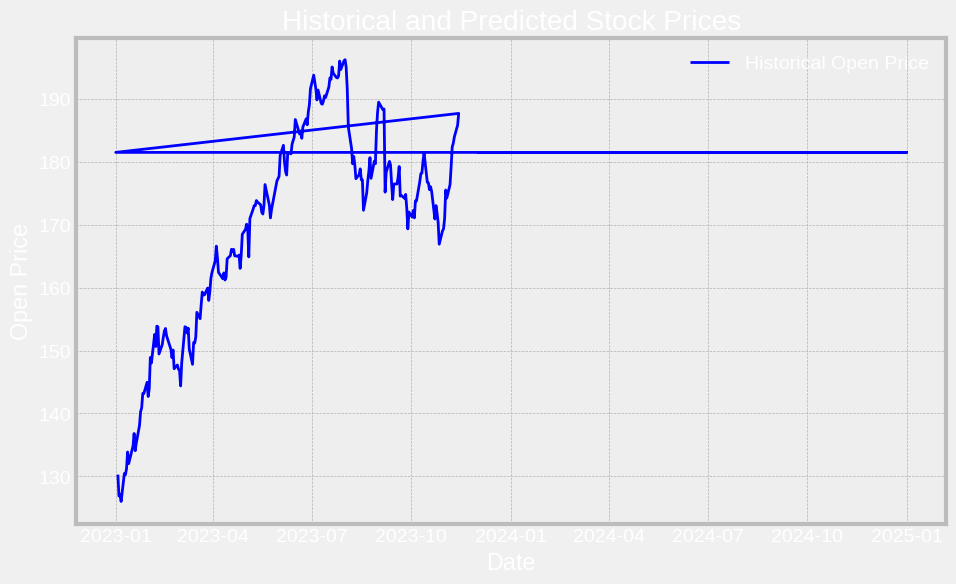

                           Open
Date                           
2023-01-03 00:00:00  130.279999
2023-01-04 00:00:00  126.889999
2023-01-05 00:00:00  127.129997
2023-01-06 00:00:00  126.010002
2023-01-09 00:00:00  130.470001
...                         ...
2023-11-14 00:00:00  187.699997
2023-01-01           181.501984
2024-01-01           181.501984
2025-01-01           181.501984
2023-12-01           181.501984

[223 rows x 1 columns]


In [134]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'stock_quote' is your historical data and 'pred_price' is your predicted price
# Add predicted price to the DataFrame
predicted_date = "2023-12-01"  # replace with the actual predicted date
stock_quote.loc[predicted_date] = [pred_price[0][0], None, None, None, None, None]  # Assuming Open price

# Plotting the historical data
plt.figure(figsize=(10,6))
plt.plot(stock_quote['Open'], label='Historical Open Price', color='blue') #plt.plot(train['Open'] , color='blue')
#plt.scatter(predicted_date, pred_price[0][0], color='red', label='Predicted Price')  # Highlight the prediction
#plt.plot(predicted_date, pred_price[0][0], label='Predict  Open Price', color='red')

# Customizing the plot
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()


# Show the plot
plt.show()

# Creating a table
# Convert the DataFrame to a table format, can be displayed or exported
table_df = stock_quote[['Open']]
print(table_df)

# Optionally, export the table to a CSV or Excel file
# table_df.to_csv('stock_prices.csv')
# table_df.to_excel('stock_prices.xlsx')


In [143]:
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Replace 'ticker_symbol' with the actual stock ticker
ticker_symbol = "AAPL"

# Get the stock quote
stock_quote = yf.download(ticker_symbol, start="2010-01-01", end="2023-11-15")

# Filter out the 'Open' column
new_df = stock_quote.filter(['Open'])

# Define the scaler and model (assuming they are already trained and available)

# Function to predict the next day's price
def predict_next_day(data):
    # Process the data as in your existing code
    last_60_days_scaled = scaler.transform(data)
    X_test = [last_60_days_scaled]
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Get the predicted scaled price
    pred_price = model.predict(X_test)

    # Undo the scaling
    return scaler.inverse_transform(pred_price)[0][0]

# Initialize the list for storing predictions
predictions = []

# Calculate the number of days to predict
today = datetime.now()
end_of_year = datetime(today.year, 12, 31)
delta = end_of_year - today

# Loop over each day
for i in range(delta.days + 1):
    # Get the last 60 days' data (updating with new predictions)
    if i > 0:
        next_day_data = np.append(new_df[-89:].values, [[predictions[-1]]], axis=0)
    else:
        next_day_data = new_df[-900:].values

    # Predict the next day's price
    next_day_pred = predict_next_day(next_day_data)
    predictions.append(next_day_pred)

    # Print the predicted price
    print(f"Predicted Opening Price of {ticker_symbol} on {today + timedelta(days=i)}: {next_day_pred}")

# predictions now contains the predicted prices from today to the end of the year


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 86ms/step
Predicted Opening Price of AAPL on 2023-11-15 20:27:31.504531: 181.5023956298828
1/1 [==============================] - 0s 30ms/step
Predicted Opening Price of AAPL on 2023-11-16 20:27:31.504531: 179.72572326660156
1/1 [==============================] - 0s 27ms/step
Predicted Opening Price of AAPL on 2023-11-17 20:27:31.504531: 179.00328063964844
1/1 [==============================] - 0s 28ms/step
Predicted Opening Price of AAPL on 2023-11-18 20:27:31.504531: 178.70999145507812
1/1 [==============================] - 0s 29ms/step
Predicted Opening Price of AAPL on 2023-11-19 20:27:31.504531: 178.5909881591797
1/1 [==============================] - 0s 30ms/step
Predicted Opening Price of AAPL on 2023-11-20 20:27:31.504531: 178.54275512695312
1/1 [==============================] - 0s 28ms/step
Predicted Opening Price of AAPL on 2023-11-21 20:27:31.504531: 178.5231933593

In [146]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Replace 'ticker_symbol' with the actual stock ticker
ticker_symbol = "AAPL"

# Get the stock quote
stock_quote = yf.download(ticker_symbol, start="2023-01-01", end="2023-11-15")

# Filter out the 'Open' column
new_df = stock_quote.filter(['Open'])

# Define the scaler and model (assuming they are already trained and available)

# Function to predict the next day's price
def predict_next_day(data):
    # Process the data as in your existing code
    last_60_days_scaled = scaler.transform(data)
    X_test = [last_60_days_scaled]
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Get the predicted scaled price
    pred_price = model.predict(X_test)

    # Undo the scaling
    return scaler.inverse_transform(pred_price)[0][0]

# Initialize DataFrame for storing predictions
predictions_df = pd.DataFrame(columns=['Date', 'Predicted_Opening_Price'])

# Calculate the number of days to predict
today = datetime.now()
end_of_year = datetime(today.year, 12, 31)
delta = end_of_year - today

# Loop over each day
for i in range(delta.days + 1):
    # Get the last 60 days' data (updating with new predictions)
    if i > 0:
        next_day_data = np.append(new_df[-59:].values, [[predictions_df.iloc[-1]['Predicted_Opening_Price']]], axis=0)
    else:
        next_day_data = new_df[-60:].values

    # Predict the next day's price
    next_day_pred = predict_next_day(next_day_data)

    # Add the prediction to the DataFrame
    predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)

# Display the DataFrame
predictions_df.head

# Optionally, you can export this DataFrame to a CSV file
# predictions_df.to_csv('AAPL_predictions.csv', index=False)


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 149ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 88ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 93ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 96ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 107ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 76ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)
<ipython-input-146-7d280a18134e>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Date': today + timedelta(days=i), 'Predicted_Opening_Price': next_day_pred}, ignore_index=True)


<bound method NDFrame.head of                          Date  Predicted_Opening_Price
0  2023-11-15 20:28:23.779320               181.501984
1  2023-11-16 20:28:23.779320               179.725174
2  2023-11-17 20:28:23.779320               179.002655
3  2023-11-18 20:28:23.779320               178.709320
4  2023-11-19 20:28:23.779320               178.590332
5  2023-11-20 20:28:23.779320               178.542084
6  2023-11-21 20:28:23.779320               178.522522
7  2023-11-22 20:28:23.779320               178.514587
8  2023-11-23 20:28:23.779320               178.511368
9  2023-11-24 20:28:23.779320               178.510040
10 2023-11-25 20:28:23.779320               178.509537
11 2023-11-26 20:28:23.779320               178.509323
12 2023-11-27 20:28:23.779320               178.509247
13 2023-11-28 20:28:23.779320               178.509186
14 2023-11-29 20:28:23.779320               178.509186
15 2023-11-30 20:28:23.779320               178.509186
16 2023-12-01 20:28:23.779320      

In [148]:
!jupyter nbconvert --to html 2 - Opening_Price_Prediction_keras.ipynb


[NbConvertApp] WARNING | pattern '2' matched no files
[NbConvertApp] WARNING | pattern '-' matched no files
[NbConvertApp] WARNING | pattern 'Opening_Price_Prediction_keras.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config

In [152]:
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Define the output directory in Google Drive
# output_dir = '/content/drive/MyDrive/ML/'

# # Path to your Jupyter notebook
# notebook_path = '/content/drive/MyDrive/ML/Combined_Stock_Price_Prediction_and_Returns_Generation.ipynb' # Replace with the path to your notebook

# # Run nbconvert to convert the notebook to HTML with only outputs
# !jupyter nbconvert --no-input --to html "$notebook_path" --output-dir "$output_dir"

# # The HTML file is now saved in the specified Google Drive directory


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/ML/Combined_Stock_Price_Prediction_and_Returns_Generation.ipynb to html
[NbConvertApp] Writing 574450 bytes to /content/drive/MyDrive/ML/Combined_Stock_Price_Prediction_and_Returns_Generation.html
